In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape


(10000,)

In [7]:

X_train[0].shape

(28, 28)

<Figure size 200x200 with 0 Axes>

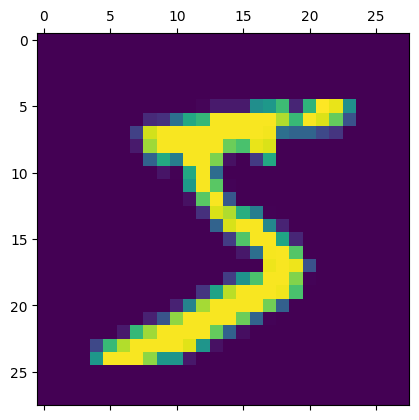

In [8]:
plt.figure(figsize=(2,2))
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

Normalization

In [10]:
X_train = X_train / 255
X_test  = X_test  / 255

In [11]:
X_train[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

Build a Convolutional neural network

In [12]:
model = keras.Sequential([

    layers.Conv2D(filters = 30,kernel_size = (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

     #Convolution Pooling
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu"),
    #Max Pooling Layer2
    layers.MaxPooling2D((2,2)),

     #Convolution Pooling
    layers.Conv2D(filters = 56, kernel_size=(3,3), activation="relu"),
    #Max Pooling Layer2
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


# kernel_size: This defines the size of the filters.(kernel_size = (3,3) = filters are 3pixels wide and 3 pixels hight)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8421 - loss: 0.4873
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0792
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9831 - loss: 0.0558
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9862 - loss: 0.0413
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0326


In [15]:

y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9781 - loss: 0.0722


[0.05515315383672714, 0.9835000038146973]

In [18]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
y_pred[:5]

array([[3.1980772e-02, 1.5959541e-01, 6.6923416e-01, 3.1416568e-01,
        2.5496900e-04, 1.1313919e-03, 2.2288111e-06, 9.9976915e-01,
        5.2354034e-02, 8.4529005e-02],
       [5.2008128e-01, 5.9314474e-02, 9.9999285e-01, 1.7023866e-01,
        1.3509861e-04, 1.2338834e-05, 7.7692193e-06, 1.6237592e-03,
        1.1580857e-03, 1.0757077e-03],
       [5.3518028e-03, 9.9929643e-01, 5.4076100e-03, 1.1795779e-03,
        5.9978470e-02, 9.0820463e-03, 4.2702738e-02, 5.5192746e-02,
        4.7402181e-02, 3.8987889e-03],
       [9.9998188e-01, 2.4315194e-04, 4.3385446e-02, 1.8944724e-03,
        1.5538649e-04, 2.4899549e-03, 3.6035231e-01, 6.7583986e-02,
        6.2805596e-03, 6.9725925e-01],
       [2.1914304e-04, 1.8894310e-01, 8.2262181e-04, 2.1064210e-04,
        9.9999845e-01, 5.5750738e-06, 1.2802372e-05, 9.9212369e-03,
        3.1908491e-04, 9.4343275e-01]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [21]:

y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)